<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/NeuralNetworkMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Inbuilt Dataset from Keras

In [2]:
from keras.datasets import mnist
(X_Train,Y_Train),(X_Test,Y_Test)=mnist.load_data()

# Print size of Train and Test Dataset

In [3]:
print("Train Data : \t", X_Train.shape)
print("Test Data : \t", Y_Train.shape)
print("Train Output : \t", X_Test.shape)
print("Test Output : \t", Y_Test.shape)

Train Data : 	 (60000, 28, 28)
Test Data : 	 (60000,)
Train Output : 	 (10000, 28, 28)
Test Output : 	 (10000,)


# Visualize Data

Output Value :  5


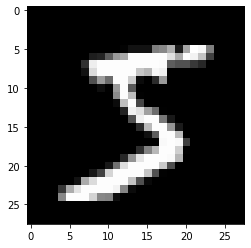

In [4]:
from matplotlib import pyplot as plt
print("Output Value : ", Y_Train[0])
plt.imshow(X_Train[0],cmap='gray')
plt.show()


# Creating categorical training Output

In [5]:
from keras.utils import np_utils
Y_Train=np_utils.to_categorical(Y_Train)
Y_Test=np_utils.to_categorical(Y_Test)

# Normalizaing Gray scale value

In [6]:
X_Train=X_Train/255
X_Test=X_Test/255
print(X_Train[5,15:20,15:20])

[[0.94901961 0.98823529 0.98823529 0.90588235 0.45882353]
 [0.81568627 0.98823529 0.98823529 0.98823529 0.98823529]
 [0.99215686 0.96862745 0.50588235 0.67843137 0.98823529]
 [0.84705882 0.25490196 0.         0.05490196 0.28235294]
 [0.11372549 0.         0.         0.         0.        ]]


# Creating *ANN*
## Experiments with batch size

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import SGD
# Training the ANN on the Training set
batches = [1, 2, 4, 6, 16, 32, 64]
epochs = [20, 40, 50]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]

batch_accuracy = {}

for batch in batches :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=0.01)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################\n for Batch size = ", batch, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = batch, epochs = 10)
  batch_accuracy[batch]=max(ann.history.history['accuracy'])


################################3
 for Batch size =  1  and epoch =  10
Epoch 1/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.2252 - accuracy: 0.9301
Epoch 2/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.1052 - accuracy: 0.9682
Epoch 3/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.0772 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 56s 926us/step - loss: 0.0623 - accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 55s 919us/step - loss: 0.0491 - accuracy: 0.9847
Epoch 6/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0437 - accuracy: 0.9859
Epoch 7/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.0372 - accuracy: 0.9883
Epoch 8/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0329 - accuracy: 0.9893
Epoch 9/10
60000/60000 [==============================] - 55s 921us/step

## Experiment with learning rate

In [8]:
learning_rate_accuracy = {}

for rate in learning_rate :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=rate)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################3\n for Batch size = ", 40, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)
  learning_rate_accuracy[rate]=max(ann.history.history['accuracy'])

################################3
 for Batch size =  40  and epoch =  10
Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7237 - accuracy: 0.8145
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3267 - accuracy: 0.9072
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2770 - accuracy: 0.9213
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.9303
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2191 - accuracy: 0.9371
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1981 - accuracy: 0.9434
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1806 - accuracy: 0.9485
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1662 - accuracy: 0.9528
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1536 - accuracy: 0.9564
Epoch 10/

# Plotting epoch vs loss

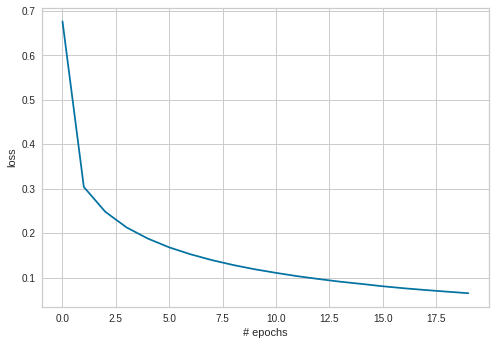

In [94]:
from matplotlib import pyplot as plt

plt.plot(ann.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

# Plotting epoch vs accuracy

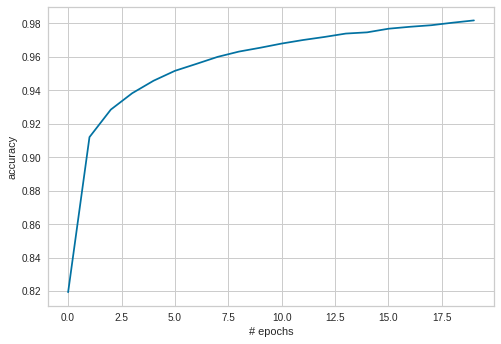

In [95]:
plt.plot(ann.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

# TEsting Test data

In [96]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(new_test_target, new_test_data)
# print(cm)
# accuracy_score(new_test_target, new_test_data)
import numpy as np
Y_Pred = ann.predict(X_Test)
print(Y_Test.shape)
print(Y_Pred.shape)

(10000, 10)
(10000, 10)


# Create Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_Pred = [np.argmax(i) for i in Y_Pred]
Y_Test = [np.argmax(i) for i in Y_Test]

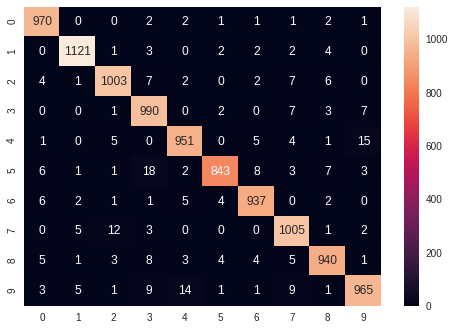

In [98]:
cm = confusion_matrix(Y_Test, Y_Pred)
accuracy_score(Y_Test, Y_Pred)

import seaborn as sns
sns.heatmap(cm,  annot=True, fmt="d")